### Importing Libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Loading Dataset

In [2]:
df = pd.read_excel('AnomaData.xlsx')
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,-0.038189,0.877951,-0.052959,-13.306135,0.101068,0.041800,0.199901,-2.327329,-0.944167,3.075199,0.123154,-0.104334,-0.570710,-9.784456,0.355960,15.842819,-0.451973,-0.105282,96,-134.27786,0.058726,-0.021645,9.366755,0.002151,-69.187583,4.232571,-0.225267,-0.196872,-0.072449,-0.103732,-0.720746,-5.412436,76.679042,-0.632727,1351.63286,-0.657096,-0.434947,-108.77597,0.084856,10.210182,11.295155,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,-0.038189,0.873273,-0.014244,-13.306135,0.101108,0.041447,0.304313,-2.340627,-0.939994,3.075199,0.123154,-0.104334,-0.574861,-9.784456,0.360160,16.491684,-0.450450,-0.092430,96,-134.48019,0.058759,-0.004579,9.350215,0.002149,-68.585197,4.311490,-0.225267,-0.196872,-0.059103,-0.083895,-0.720746,-8.343222,78.181598,-0.632727,1370.37895,-0.875629,-1.125819,-108.84897,0.085146,12.534340,11.290761,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,-0.018352,1.004910,0.065150,-9.619596,0.101148,0.041095,0.252839,-2.353925,-0.935824,3.075199,0.123154,-0.104334,-0.579013,-9.784456,0.364356,15.972885,-0.448927,-0.097144,96,-133.94659,0.058791,-0.084658,9.037409,0.002148,-67.838187,4.809914,-0.225267,-0.186801,-0.048696,-0.073823,-0.720746,-1.085166,79.684154,-0.632727,1368.12309,-0.037775,-0.519541,-109.08658,0.085436,18.582893,11.286366,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,-0.008280,0.930037,-0.067199,-15.196531,0.101188,0.040742,0.072873,-2.367223,-0.931651,3.075199,0.123154,-0.104334,-0.583165,-9.784456,0.368556,15.608688,-0.447404,-0.160073,96,-134.00259,0.058824,-0.055118,9.020625,0.002146,-67.091148,5.308343,-0.225267,-0.186801,-0.047017,-0.063752,-0.720746,6.172891,81.186702,-0.632727,1365.69145,-0.987410,0.674524,-109.56277,0.085726,17.719032,11.281972,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,-0.008280,0.828410,-0.018472,-14.609266,0.101229,0.040390,0.171033,-2.380521,-0.927478,3.075199,0.123154,-0.104334,-0.587316,-9.784456,0.372756,15.606125,-0.445879,-0.131630,96,-133.14571,0.058856,-0.153851,9.344233,0.002145,-65.991813,5.806771,-0.225267,-0.186801,-0.057088,-0.063752,-0.720746,-3.379599,82.689258,-0.632727,1363.25786,-0.238445,-0.063044,-110.03891,0.086016,16.855202,11.277577,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


### Exploratory Data Analysis - EDA

In [3]:
print("Number of rows and columns in our dataset are: ", df.shape)

Number of rows and columns in our dataset are:  (18398, 62)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

There are no objects dtypes in our dataset.

In [5]:
df.describe()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
count,18398,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,1999-05-15 01:20:42.728557312,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,-0.003056,-0.002511,-0.011166,0.014964,1.418065,0.003222,0.001107,-0.075376,0.138210,0.105010,0.463652,-0.001578,0.076673,-0.036124,-0.088743,-0.393265,0.635612,0.048185,-0.006214,100.141646,7.054580,0.003785,-0.000296,-0.400527,0.000090,4.525465,0.050165,-0.001182,-0.021693,-0.004367,-0.003903,-0.036444,-0.006410,0.266766,0.070846,403.959326,0.090221,0.032000,-0.983876,0.002474,5.051040,0.602553,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
min,1999-05-01 00:00:00,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,-0.120087,-0.098310,-26.191152,-22.223434,-164.897670,-0.028775,-0.623730,-19.901141,-14.081542,-18.313006,-156.929680,-1.520451,-7.106501,-3.228480,-236.783570,-12.411317,-579.412730,-2.333210,-1.807603,51.000000,-228.302190,-0.262892,-0.539117,-608.372930,-0.001809,-508.638880,-4.764285,-0.945199,-1.706928,-0.147118,-0.163853,-5.700757,-58.183432,-39.592770,-0.632727,-3768.476500,-2.753967,-2.453742,-174.148590,-5.484846,-450.744260,-23.448985,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,1999-05-08 03:36:30,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,-0.059966,-0.048260,-0.268052,-0.188745,-28.720384,-0.028775,-0.019850,-0.260779,-1.329108,-1.321521,-3.926967,0.123154,-0.408417,-0.604798,-4.784303,-4.291578,4.265595,-0.750072,-0.246588,84.000000,-66.014561,-0.083071,-0.065516,4.077524,-0.000990,-55.730629,-0.760257,-0.165146,-0.186801,-0.086997,-0.103732,-0.230619,-2.987541,-39.051126,-0.632727,-637.123492,-0.778840,-0.434027,-32.335066,-0.011280,-64.577736,-3.883678,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,1999-05-14 18:39:00,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,-0.030057,-0.018352,0.367737,0.511975,0.387522,-0.028775,0.002187,0.201777,-0.527784,-0.627076,3.075199,0.123154,-0.104334,-0.230342,-0.205408,0.220845,7.586258,-0.181393,0.107681,96.000000,27.755752,0.060843,-0.002557,5.846613,0.000311,25.756509,0.037213,-0.005229,-0.047026,-0.054631,-0.053986,0.269274,-0.077903,-36.681261,-0.632727,912.977579,-0.416882,-0.075129,31.360231,0.050032,19.014931,0.065663,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,1999-05-22 06:01:30,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,0.001990,0.011557,0.820468,0.749715,36.818686,-0.028775,0.020421,0.662305,1.438410,1.454142,3.075199,0.123154,0.901555,0.775548,4.442544,1.873631,10.650238,0.823543,0.373235,112.000000,91.181847,0.069487,0.066371,7.930278,0.000567,62.300928,1.241757,0.124780,0.162941,0.003033,0.014863,0.379140,2.991708,29.10

### Features of the Data

In [6]:
df.columns

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'y.1'],
      dtype='object')

### Check for Duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicates values in our dataset.

### Check for Null Values

In [8]:
df.isnull().sum()*100/len(df)

time    0.0
y       0.0
x1      0.0
x2      0.0
x3      0.0
       ... 
x57     0.0
x58     0.0
x59     0.0
x60     0.0
y.1     0.0
Length: 62, dtype: float64

There are no null values in our dataset.

### Check for Distribution of Target Values

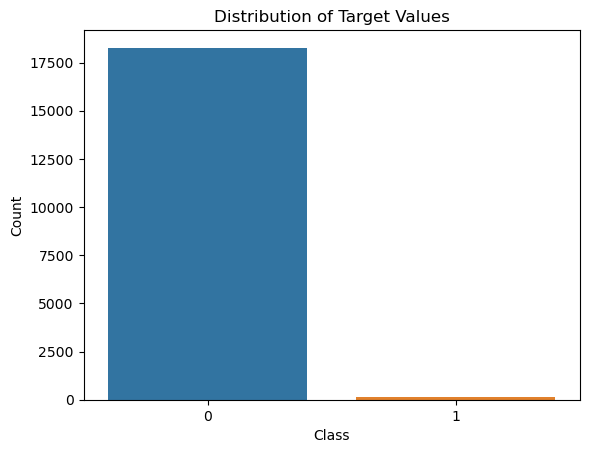

In [11]:
value_counts = df['y'].value_counts()

target_barplot = sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Target Values')
plt.show()

Class 0 is outnumbering Class 1 so we can clearly see that there is a huge imblance in our dataset.

### Relation between numerical and target columns using pairplot

[]

<Figure size 1000x800 with 0 Axes>

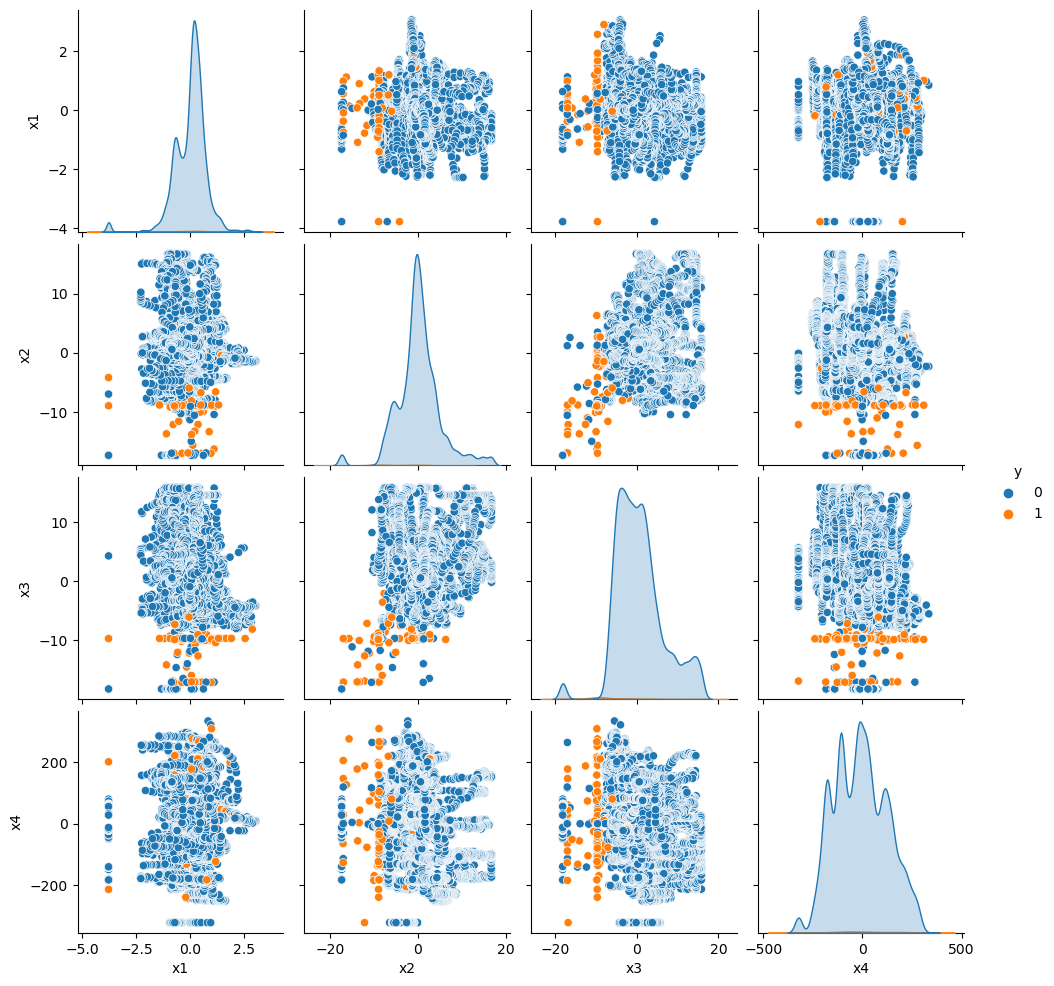

In [12]:
plt.figure(figsize=(10, 8))
sns.pairplot(df[['time', 'x1', 'x2', 'x3', 'x4', 'y']], hue='y')
plt.plot()

[]

<Figure size 1000x800 with 0 Axes>

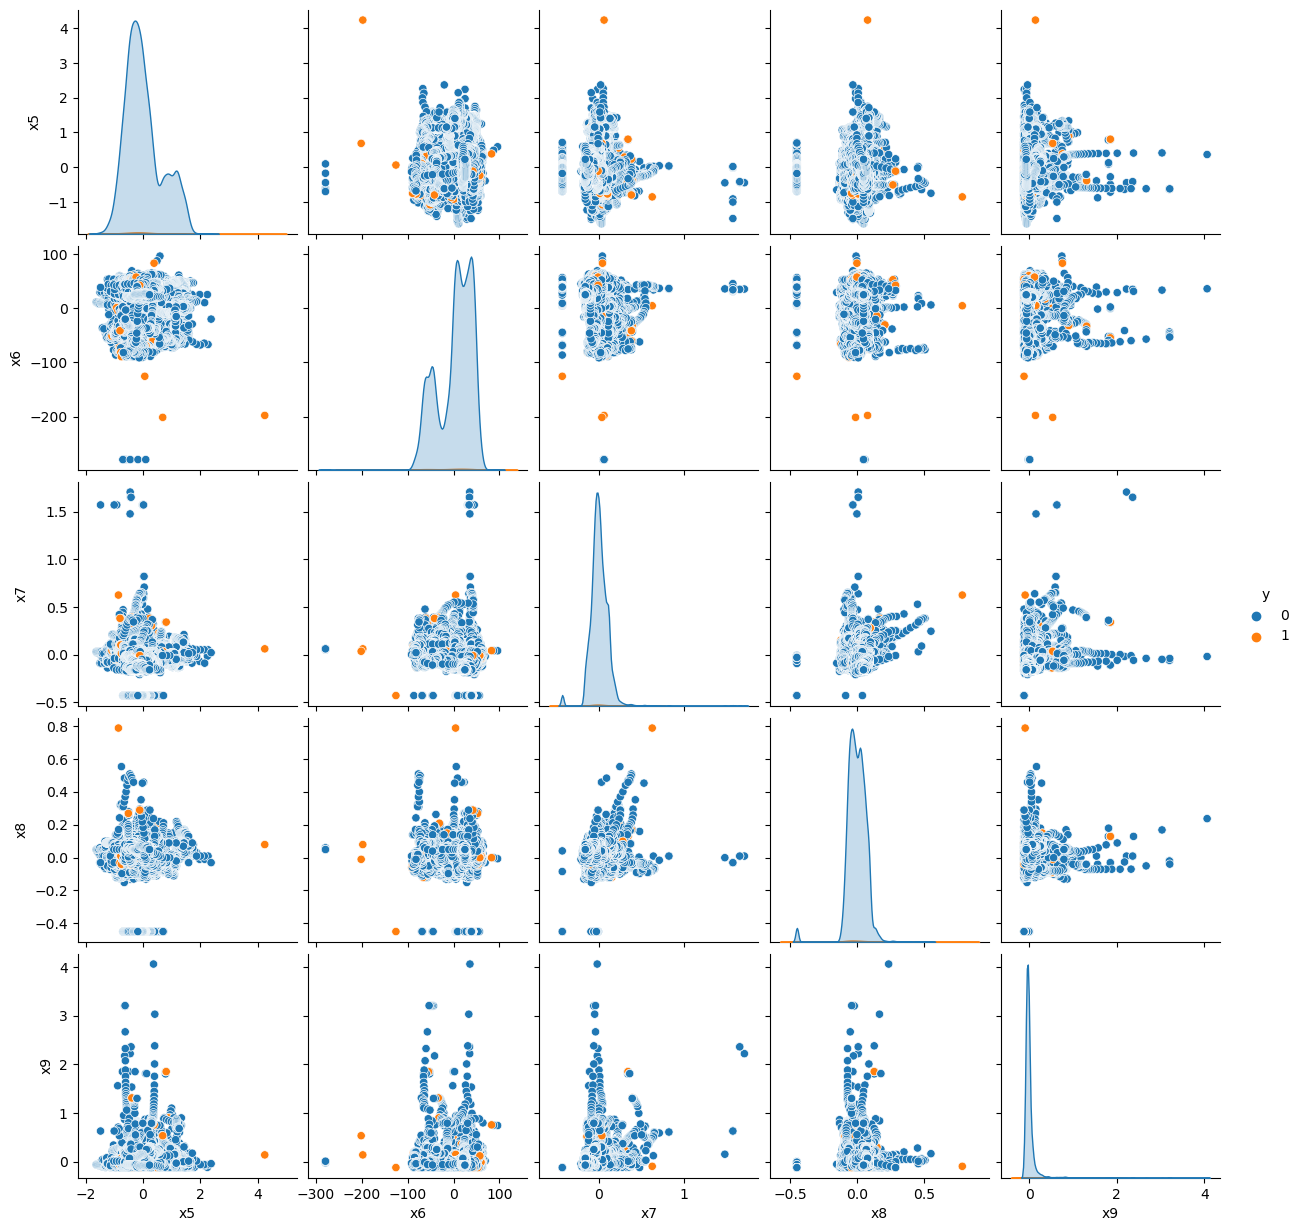

In [13]:
plt.figure(figsize=(10, 8))
sns.pairplot(df[['x5', 'x6', 'x7', 'x8', 'x9', 'y']], hue='y')
plt.plot()

<Figure size 1000x800 with 0 Axes>

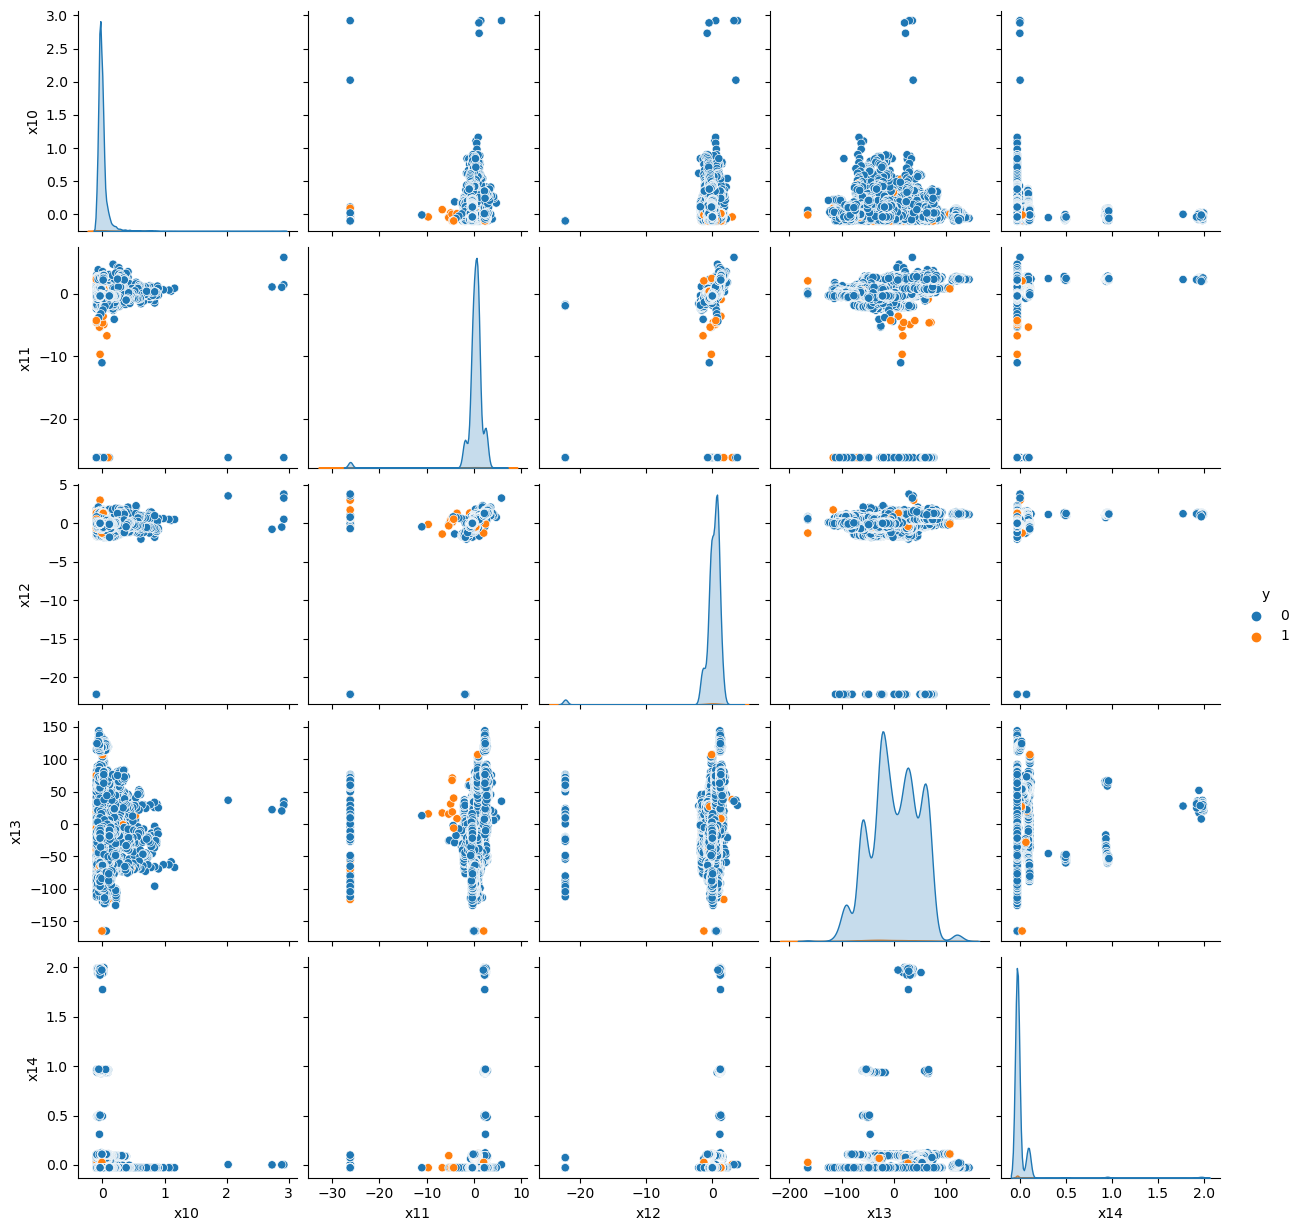

In [14]:
plt.figure(figsize=(10, 8))
sns.pairplot(df[['x10', 'x11', 'x12', 'x13', 'x14', 'y']], hue='y')
plt.show()

<Figure size 1000x800 with 0 Axes>

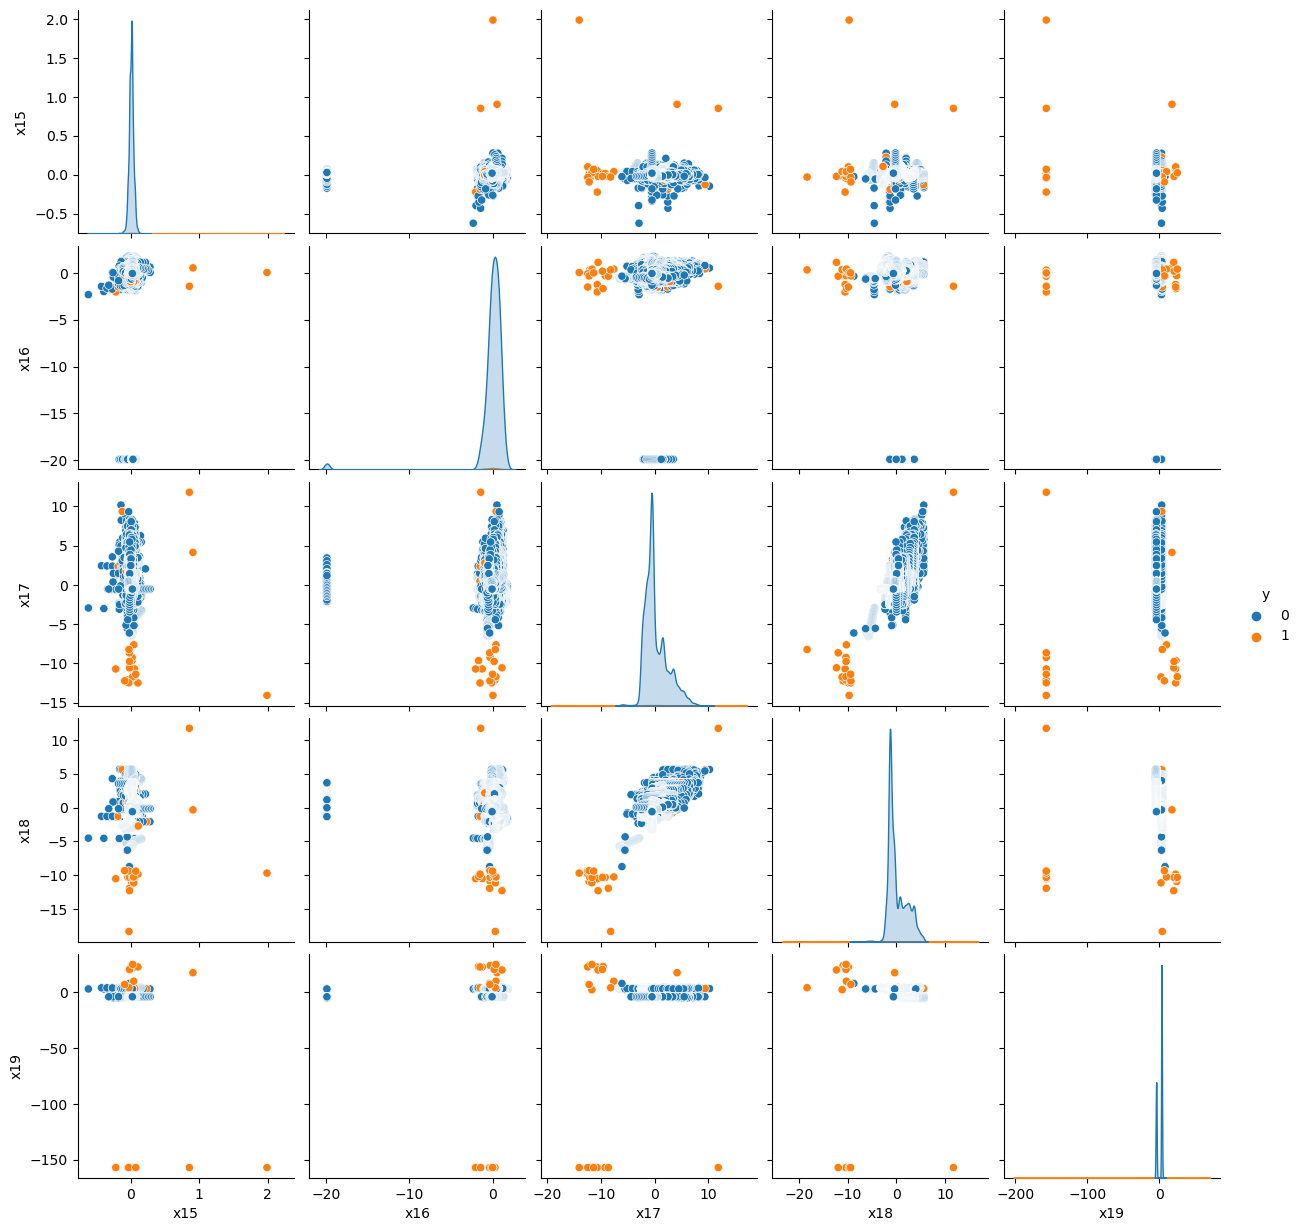

In [15]:
plt.figure(figsize=(10, 8))
sns.pairplot(df[['x15', 'x16', 'x17', 'x18', 'x19', 'y']], hue='y')
plt.show()

### Check for Multicollinearity

In [16]:
# calculating multicollinearity
corr_matrix = df.drop(['y'], axis=1).corr()

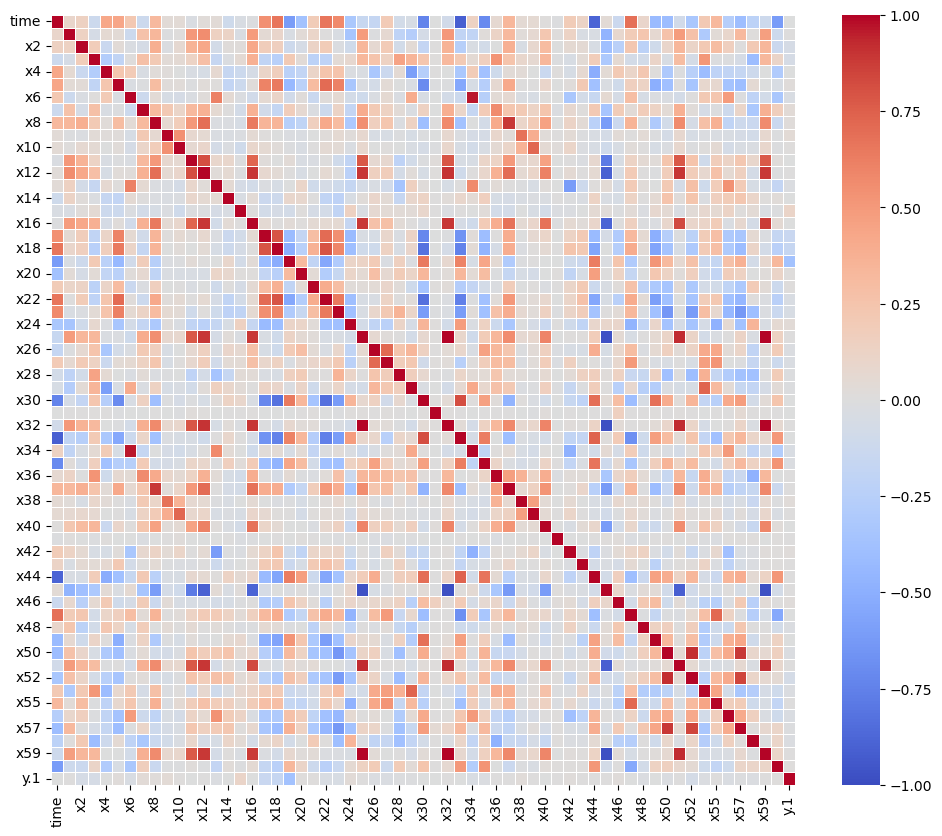

In [17]:
# Set plot size
plt.figure(figsize=(12, 10))

# Plot heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, vmax=1, vmin=-1)

# Show plot
plt.show()

### Check for Outliers 

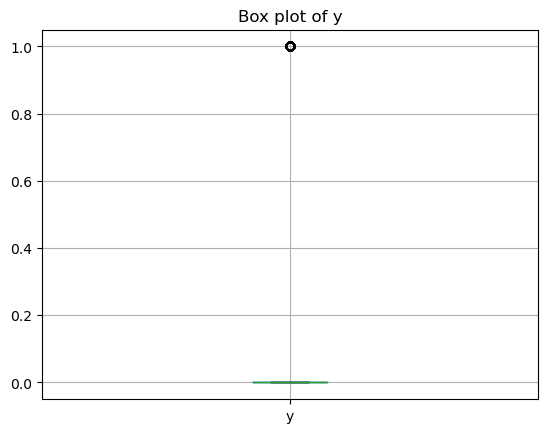

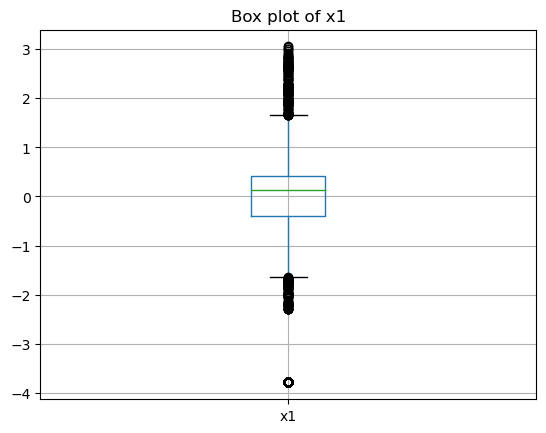

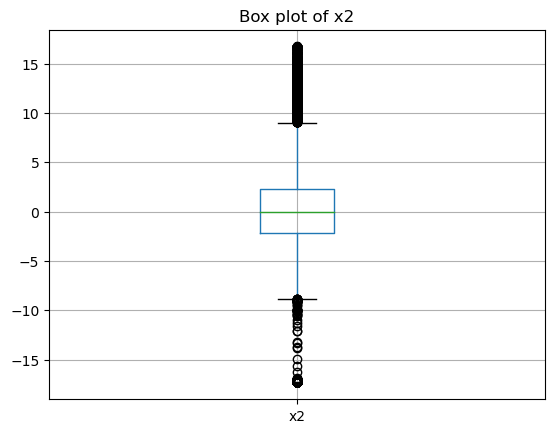

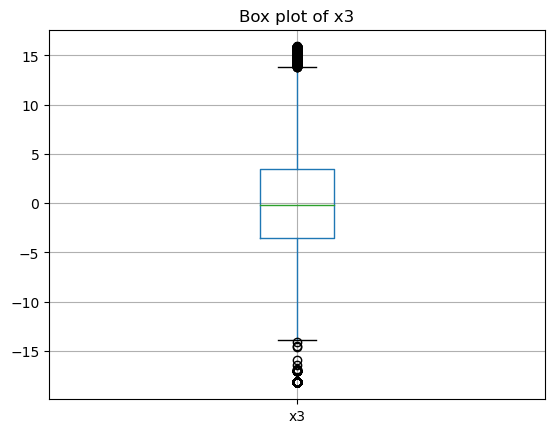

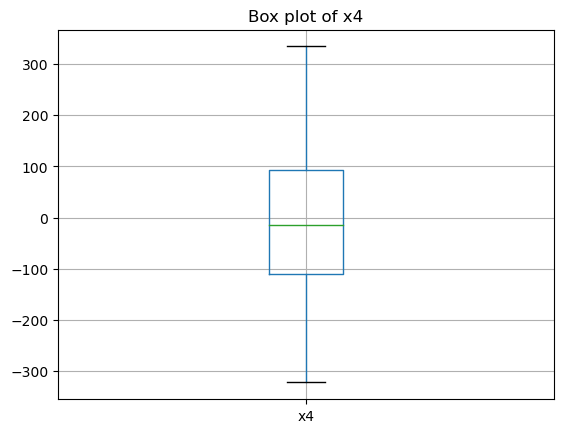

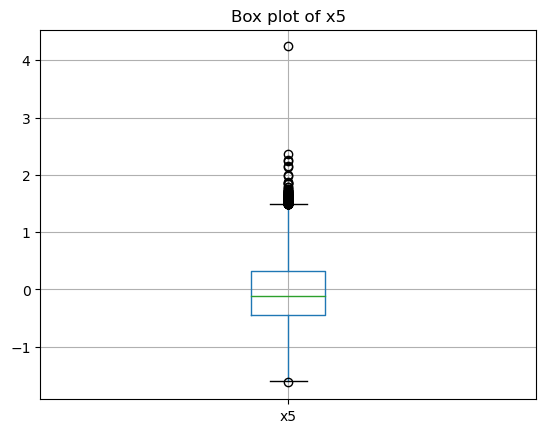

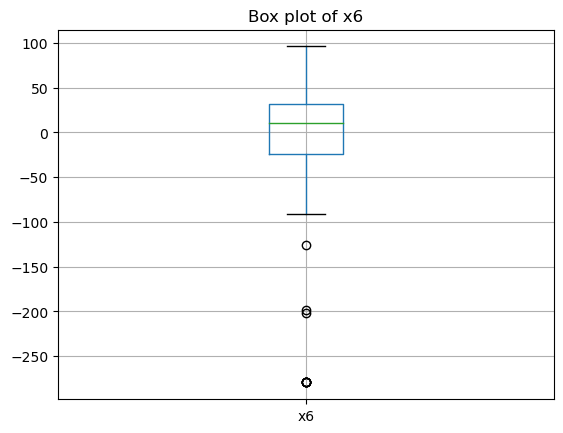

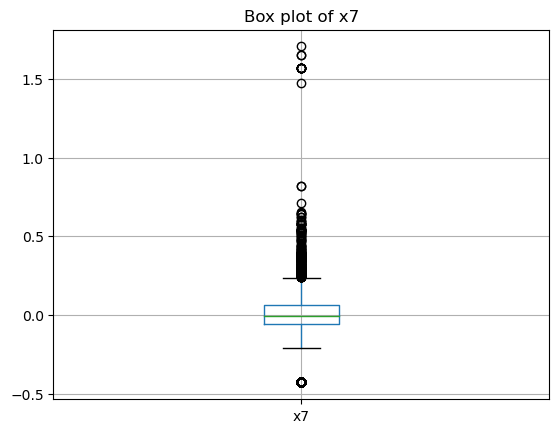

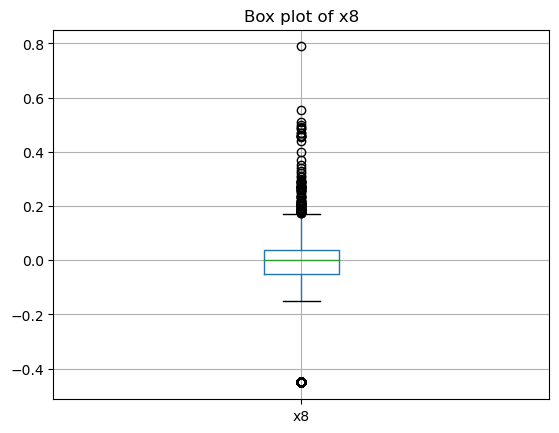

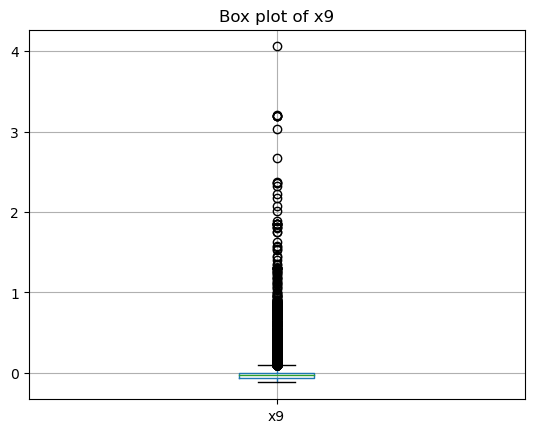

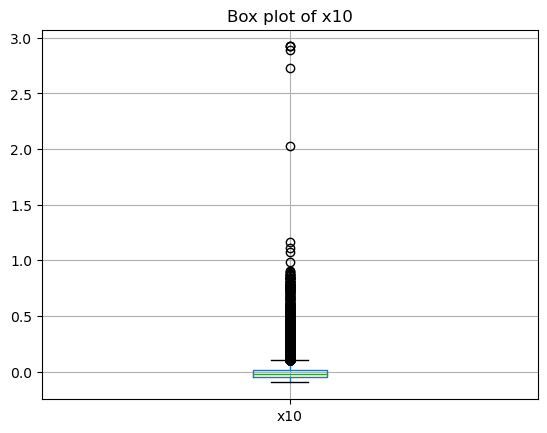

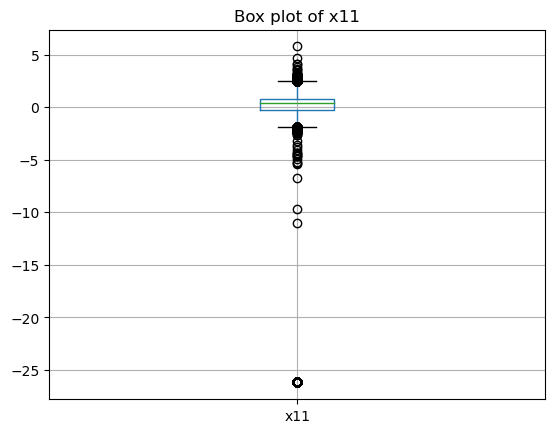

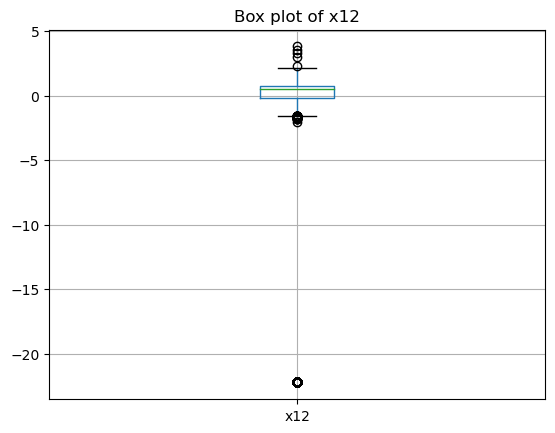

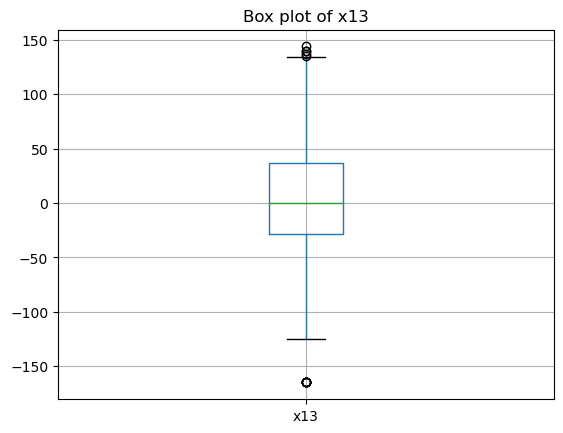

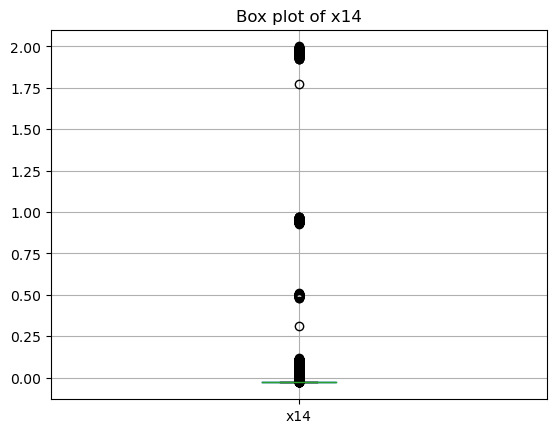

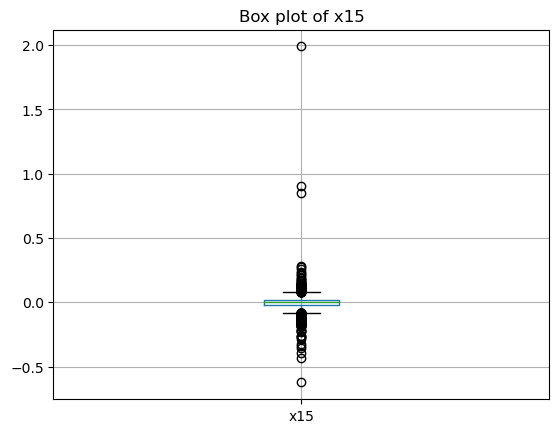

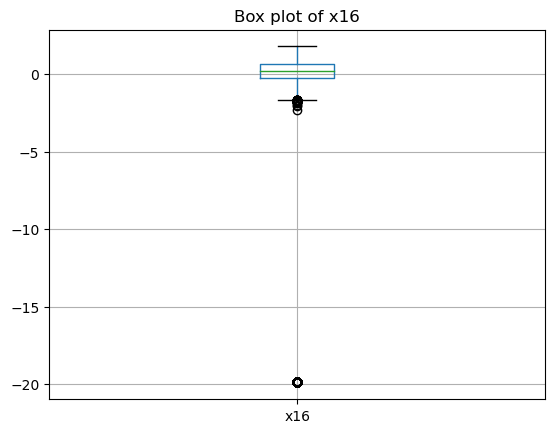

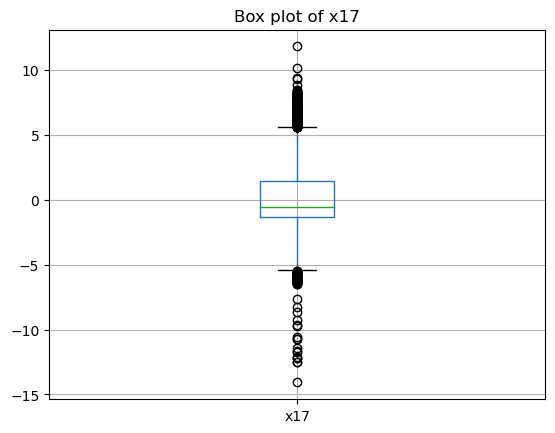

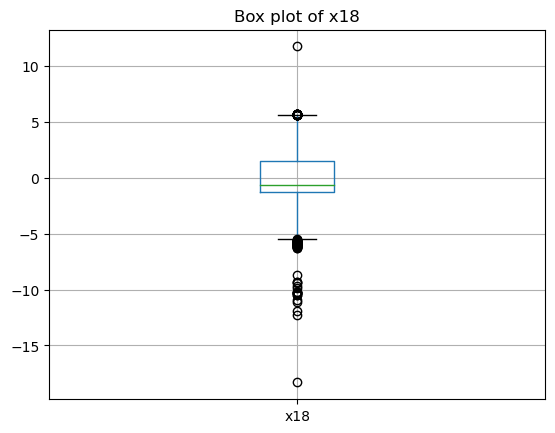

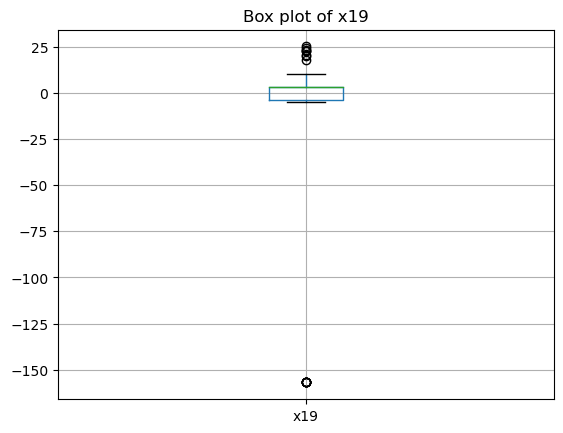

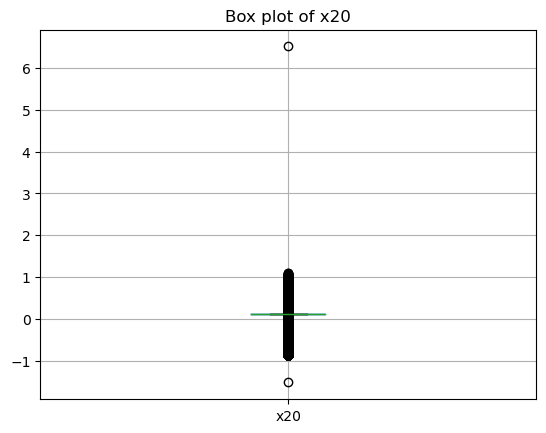

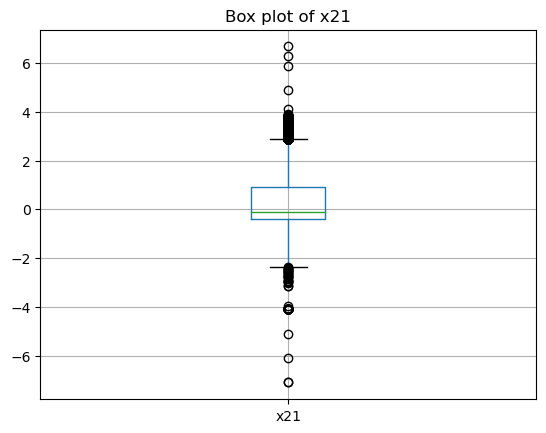

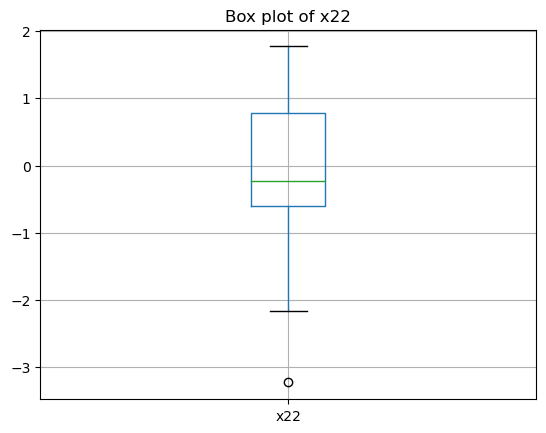

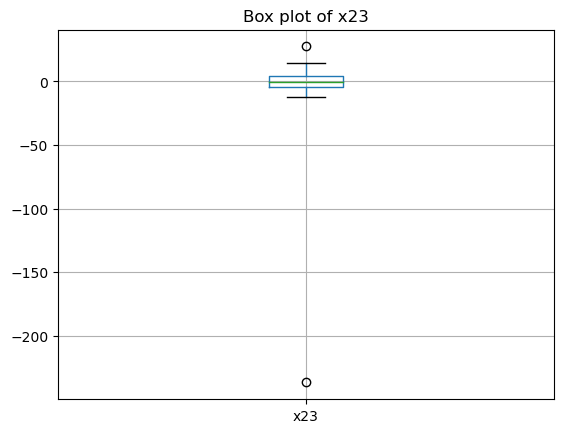

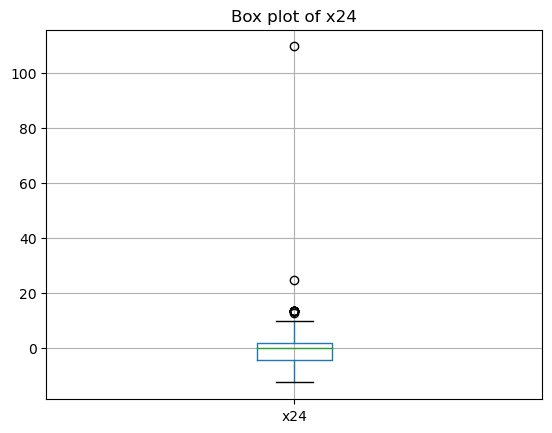

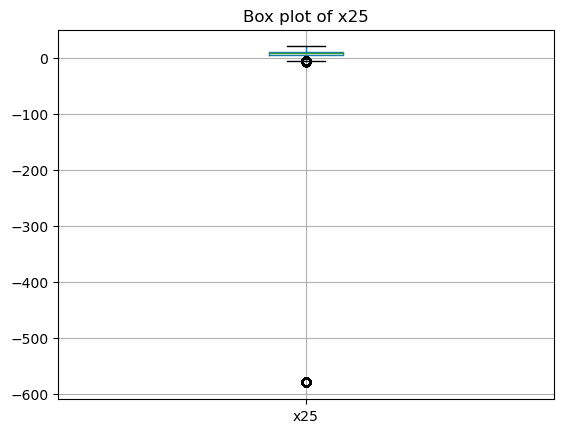

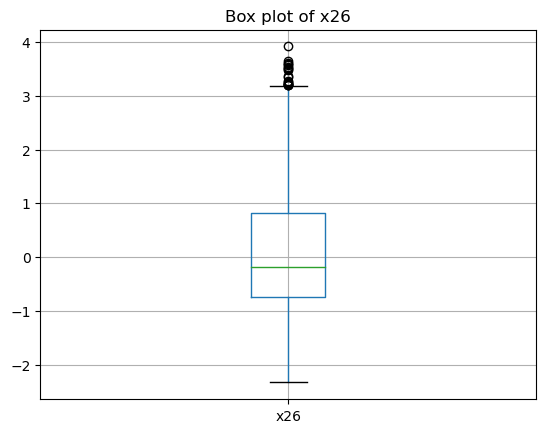

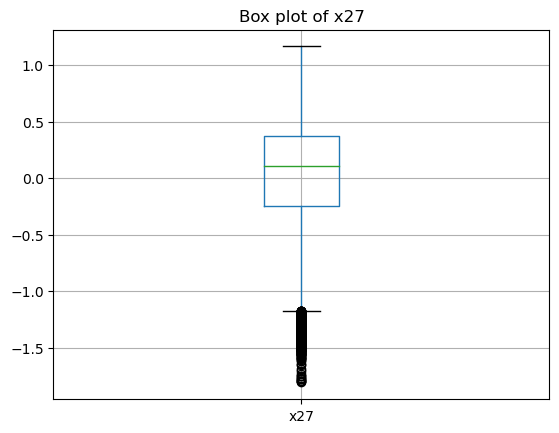

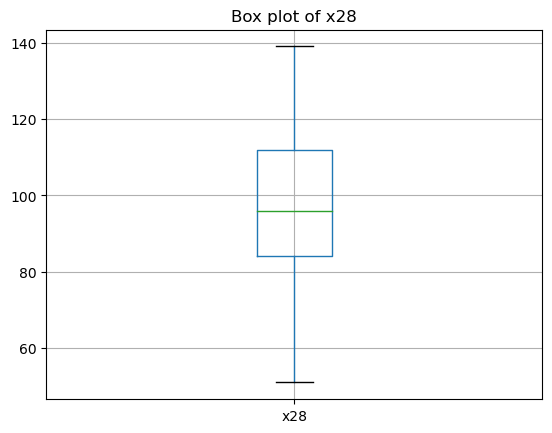

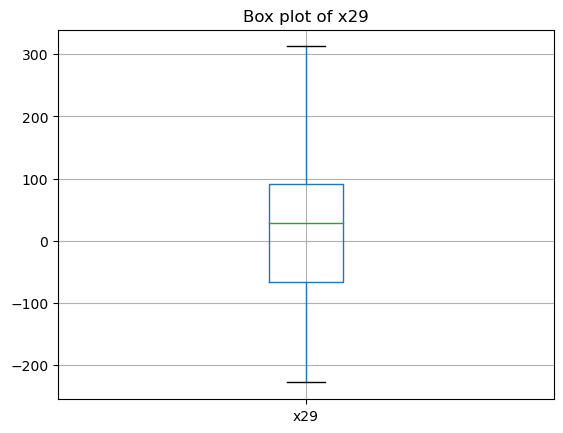

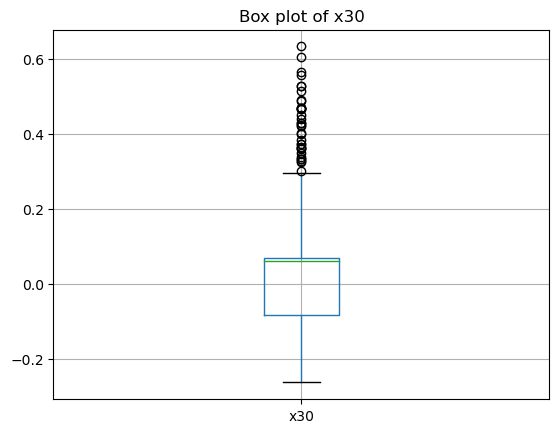

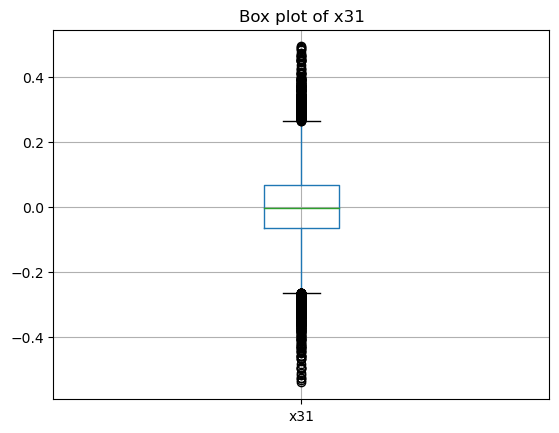

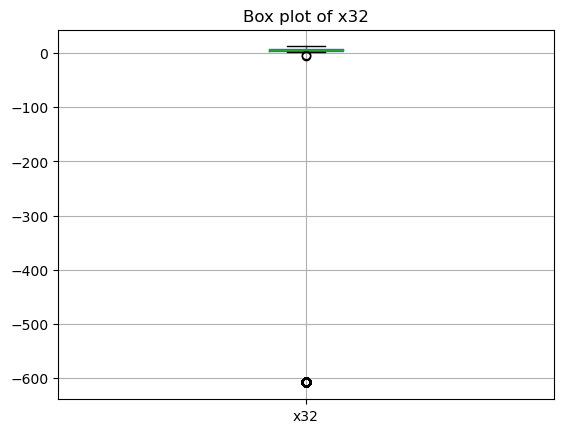

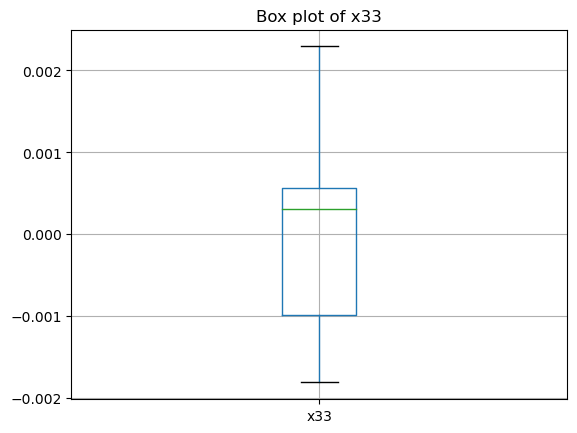

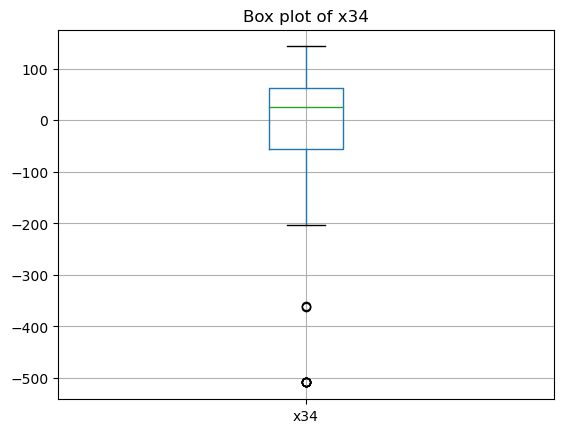

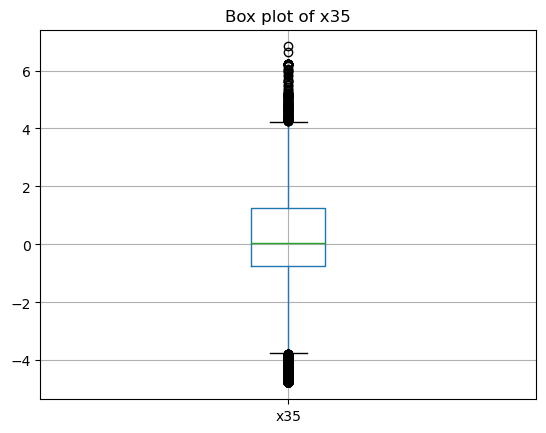

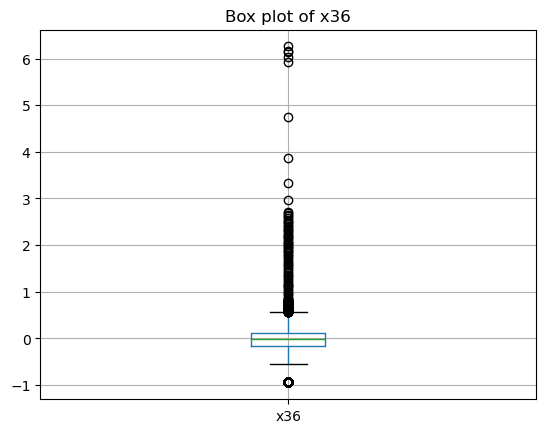

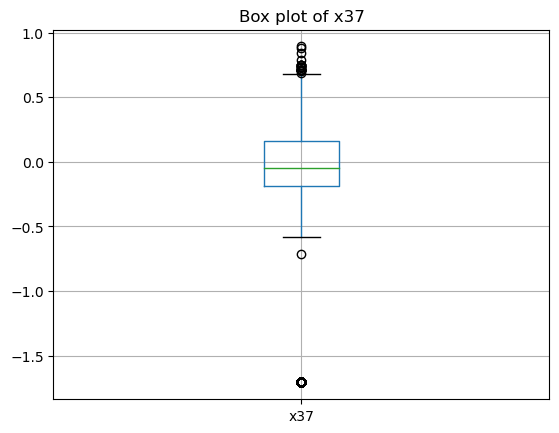

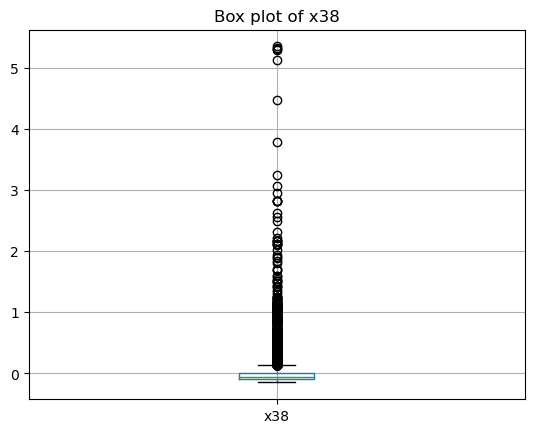

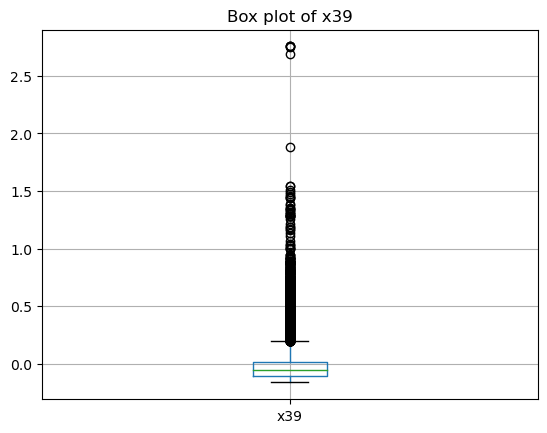

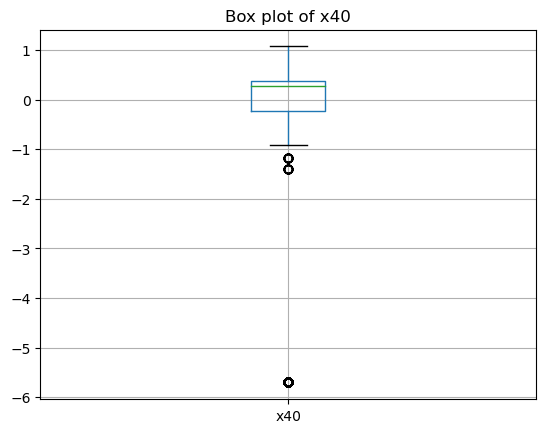

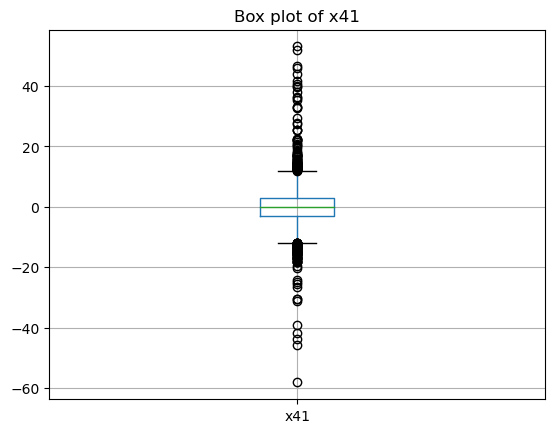

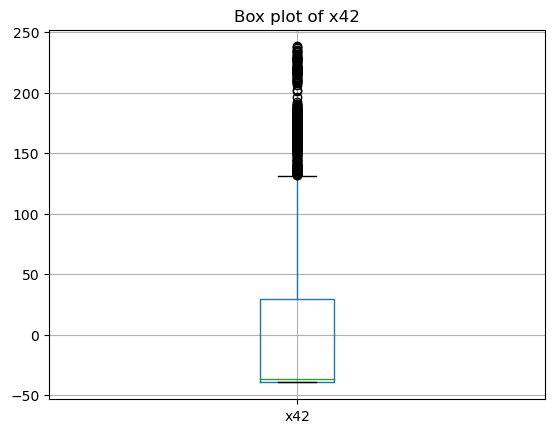

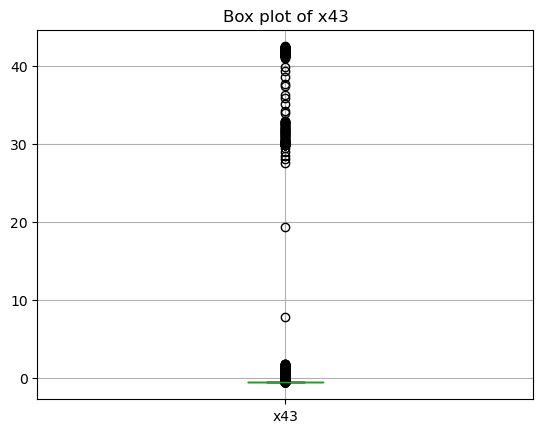

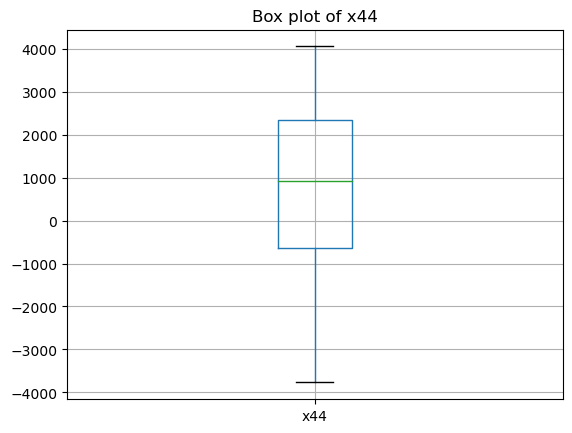

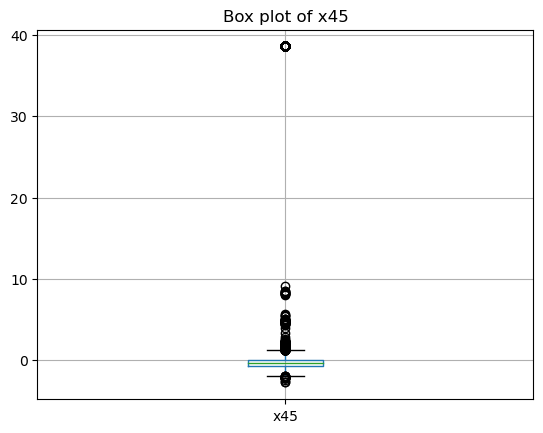

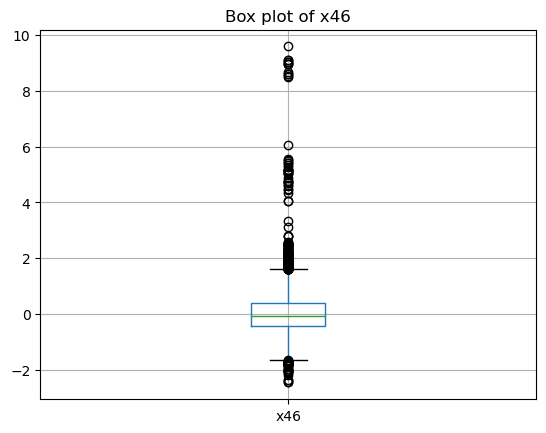

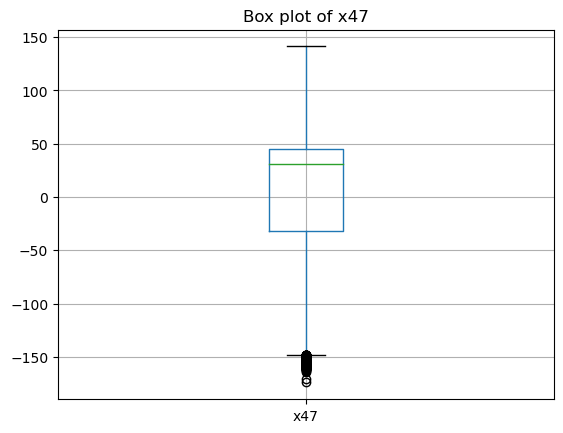

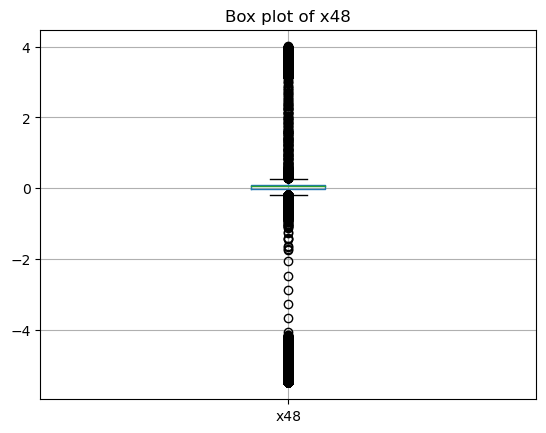

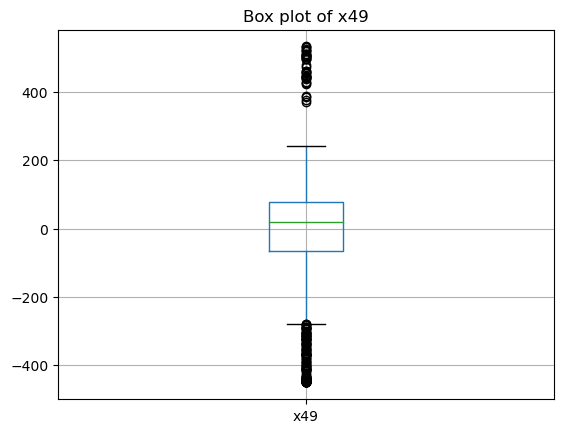

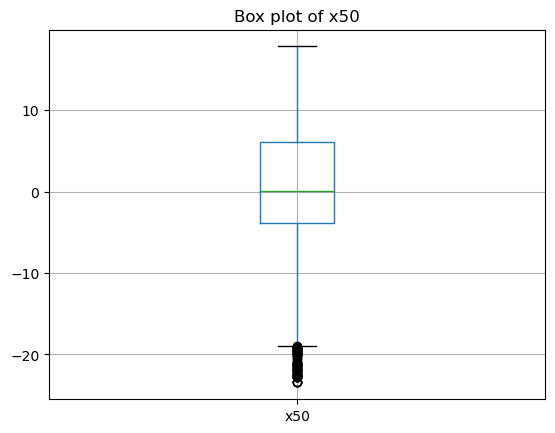

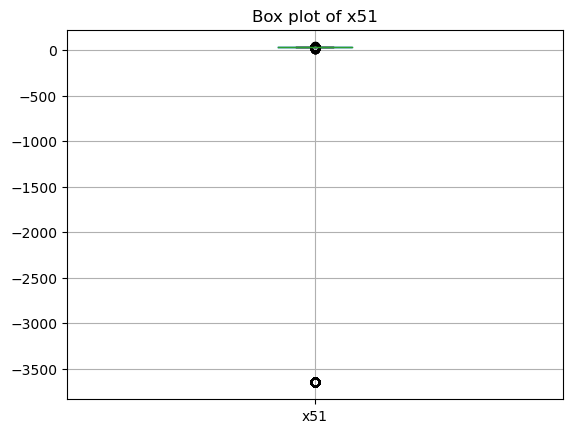

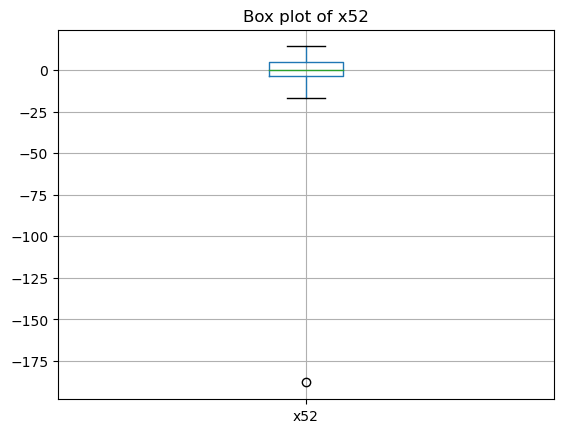

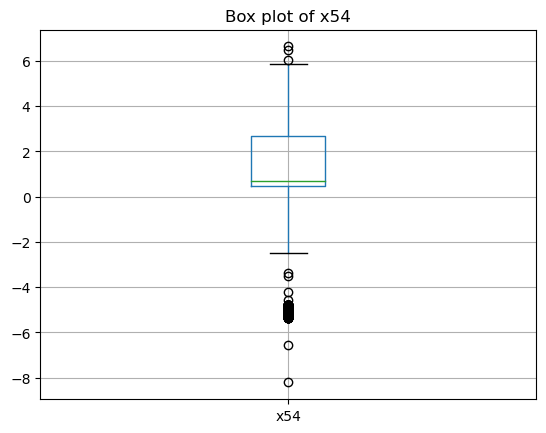

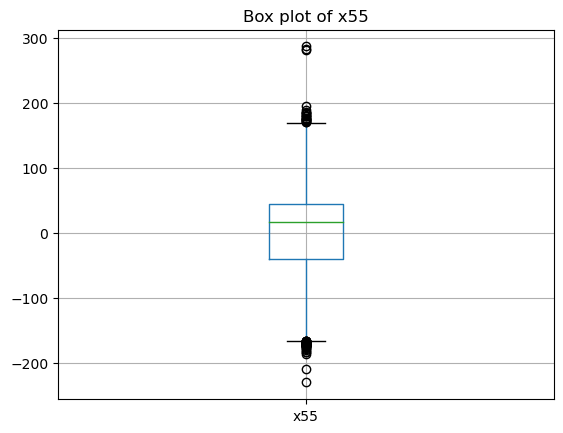

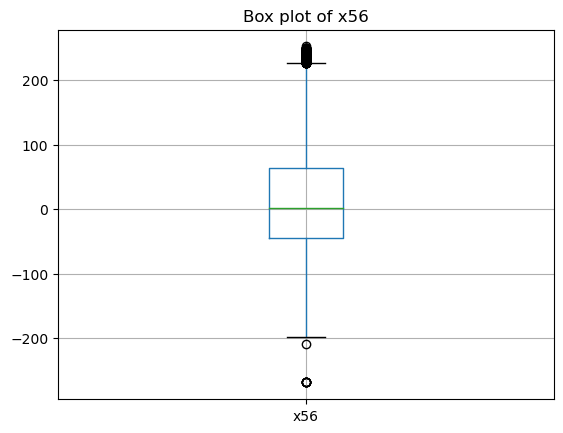

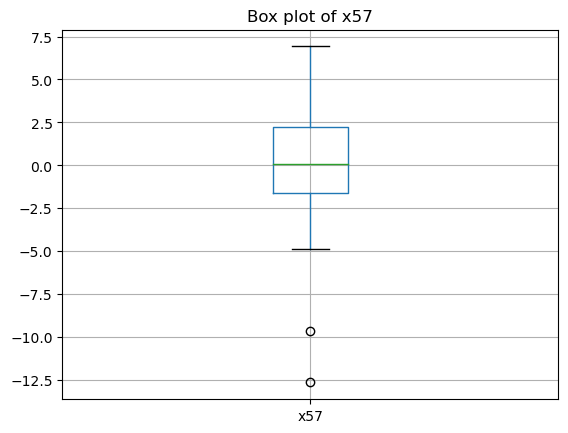

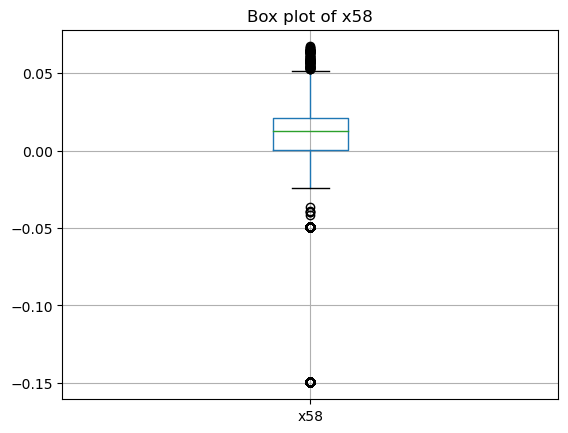

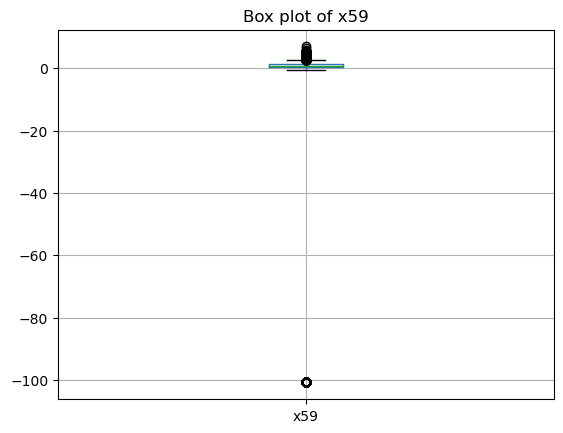

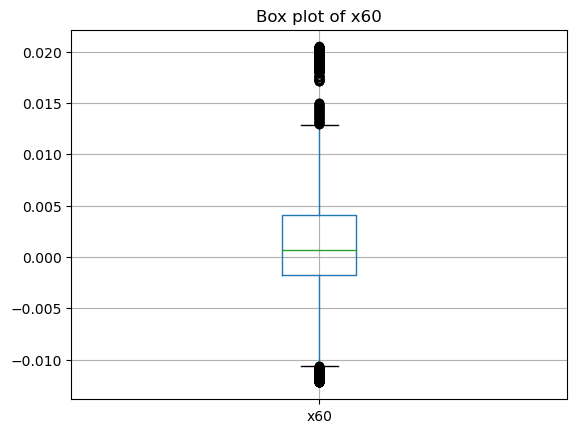

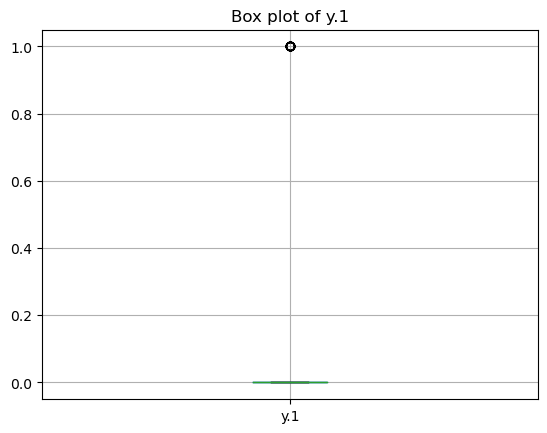

In [21]:
import matplotlib.pyplot as plt

df_col = df.drop(['time'], axis=1)

for column in df_col:
  plt.figure()
  df.boxplot([column])
  plt.title(f'Box plot of {column}')
  plt.show()

We can see from the above boxplot that there are outliers in our dataset.

### Outlier Treatment

In [22]:
def outlier_treatment(dataset):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
dataset = outlier_treatment(df)

### Feature Scaling and Feature Engineering

In [23]:
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['day_of_week'] = df['time'].dt.weekday
#df['time'] = df['time'].apply(lambda x: x.toordinal())

In [ ]:
df['x_mean'] = df[['x1', 'x2', 'x3', 'x4']].mean(axis=1)
df['x_std'] = df[['x1', 'x2', 'x3', 'x4']].std(axis=1)

In [ ]:
df['x_mean']

In [ ]:
df['x_std']

### Balancing Dataset

**There are two ways in which a dataset can be made balanced- Oversampling and Undersampling**

- Oversampling duplicates or creates new synthetic rows in the minority class.

- Undersampling deletes or merges examples in the majority class.

- Either undersampling or oversampling can be done when the difference between the count of minority and majority class is less.   But if the difference is high oversampling will lead to too much redundant data and undersampling will lead to huge loss of     data.

- In our case as the difference between the two classes is high we calculate the average count of the two classes and oversample   the minority class to the average value followed by undersampling the majority class to the average value.

In [25]:
X = df.drop(['time', 'y'], axis=1)  
y = df['y']

count_0 = y.value_counts()[0]
count_1 = y.value_counts()[1]
average_count = int((count_0 + count_1) / 2)


resampling_pipeline = Pipeline([
    ('oversampler', SMOTE(sampling_strategy={1: average_count})),
    ('undersampler', RandomUnderSampler(sampling_strategy={0: average_count}))
])


X_resampled, y_resampled = resampling_pipeline.fit_resample(X, y)

X,y =X_resampled, y_resampled
df_resampled = pd.concat([X,y],axis=1)
df_resampled.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1,hour,day,month,day_of_week,y
0,0.329864,-1.430164,-2.295113,15.628212,1.065099,41.653755,-0.009338,0.078965,-0.010220,0.021628,-0.000167,0.686022,0.022219,-0.028775,-0.020815,0.725768,6.261336,2.883260,-3.926967,0.123154,0.901555,1.427282,11.991644,-5.614236,2.709335,0.835467,0.391955,139,142.852112,-0.133846,-0.003676,2.696223,-0.001326,98.088845,-1.761264,0.234952,0.343000,-0.047017,0.026277,0.279345,-4.832236,-37.938716,-0.632727,799.320359,-0.611967,-0.083186,39.727632,0.039003,-49.410423,-6.038097,29.984624,-6.322830,3.148742,45.450015,18.730615,-2.221363,0.001853,0.310526,-0.003074,0,19,19,5,2,0
1,1.677059,-4.254779,-2.496985,-82.338480,-0.188029,-56.879204,0.110598,0.013808,-0.035429,0.026663,0.896060,-0.057842,-30.716947,0.109069,-0.018746,-0.013879,-2.517591,-1.222625,3.075199,0.123154,-0.104334,-1.226466,-9.784456,-0.123944,16.688278,-0.270572,-0.122058,96,-97.377777,0.066948,0.013249,9.553828,0.002123,-129.055930,3.775773,-0.075116,-0.016813,-0.027180,0.081058,-0.710676,-6.784995,51.688091,-0.632727,1411.127000,-0.534521,0.375322,-132.915370,-0.472433,-23.182396,9.824940,29.984624,11.003830,-5.009896,-78.981869,-18.931403,4.114269,0.039365,1.224985,0.007795,0,6,1,5,5,0
2,1.219019,-4.538500,-2.027302,-76.125253,-0.164912,-53.226005,0.100832,-0.061114,0.009922,0.011557,1.109654,0.105486,-31.391401,0.108707,-0.022697,-0.011077,-2.517591,-1.058604,3.075199,0.123154,-0.104334,-1.226466,-9.784456,-0.079488,16.026413,-0.275612,-0.035786,96,-96.110977,0.064888,0.129696,9.752986,0.002123,-119.931600,4.232571,-0.185288,-0.236851,-0.039272,-0.013702,-0.720746,4.392739,55.147258,-0.632727,1285.767620,0.877836,-0.162840,-124.258390,-0.437315,-18.665855,9.902089,29.984624,10.962082,-5.009047,-73.135312,-11.347174,4.114269,0.037568,1.198176,0.007716,0,6,1,5,5,0
3,0.421985,-7.110560,11.531471,57.779303,-0.798075,-2.544243,0.110598,0.078965,-0.080108,-0.098310,0.181609,0.832100,-39.199437,-0.028775,0.043346,0.891921,-2.195428,-0.768233,3.668631,-0.422081,-1.100459,-0.230342,5.216002,-4.413026,8.739975,1.215096,0.417455,139,24.446045,0.069808,0.043973,6.428523,0.000261,-27.817954,1.241757,0.444919,0.292950,-0.092347,-0.153782,0.329395,-1.758628,84.255855,-0.632727,912.796919,0.010751,0.248716,48.665925,0.030756,82.533943,-1.545177,29.984624,-1.277176,3.096063,43.984683,-115.366570,1.337108,-0.149790,1.186426,0.000888,0,11,16,5,6,0
4,-0.378783,12.256837,13.952641,-100.213110,0.178152,15.624672,0.060853,-0.021135,0.039830,0.071678,-0.593173,-0.096252,-14.373426,-0.028775,0.072070,-0.231961,-0.527784,-1.099318,3.075199,0.123154,-1.761694,-0.894644,-2.607462,1.583251,11.725815,0.136965,0.227654,118,93.337555,0.066943,-0.127996,6.032221,0.000620,52.144082,2.242764,0.054893,-0.036955,0.142808,0.328632,0.349232,2.259805,-34.921908,-0.632727,2943.496140,-0.686114,-0.527049,-101.838470,0.068148,60.298439,2.129384,29.984624,0.917160,2.582519,-6.276669,101.076745,0.146862,0.020980,0.631724,0.005506,0,20,6,5,3,0


In [53]:
df_resampled['y'].value_counts()

y
0    9199
1    9199
Name: count, dtype: int64

### Scaling

In [57]:
# Create the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(df_resampled)

### Split and Train the Model

In [59]:
X = df_resampled.drop(['y'], axis=1)
y = df_resampled['y']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (14718, 64)
X_test shape:  (3680, 64)
y_train shape:  (14718,)
y_test shape:  (3680,)


### Random Forest Model

In [62]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [63]:
y_pred = rf_model.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score, log_loss

In [65]:
accuracy_score(y_test, y_pred)

0.998641304347826

In [66]:
target_names = ['Negative(0)', 'Positive(1)']

print(classification_report(y_test, rf_model.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       1.00      1.00      1.00      1838
 Positive(1)       1.00      1.00      1.00      1842

    accuracy                           1.00      3680
   macro avg       1.00      1.00      1.00      3680
weighted avg       1.00      1.00      1.00      3680



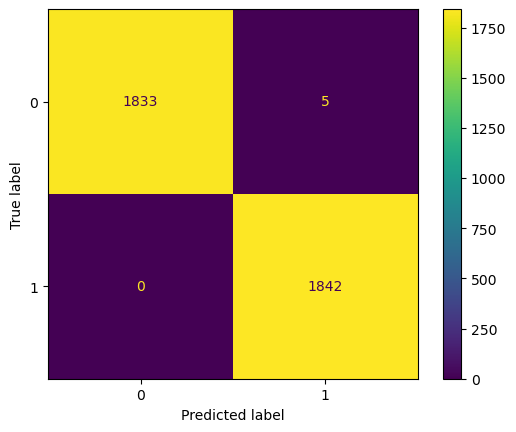

In [67]:
plot_confusion_matrix(rf_model, X_test, y_test)

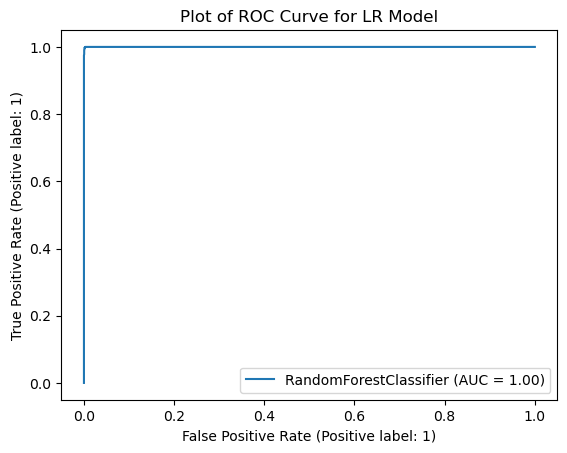

In [68]:
plot_roc_curve(rf_model, X_test, y_test)
plt.title("Plot of ROC Curve for LR Model")
plt.show()

In [69]:
log_loss(y_test, rf_model.predict(X_test))

0.046928771728725026

In [70]:
features = list(X_train.columns)

In [71]:
importances = rf_model.feature_importances_

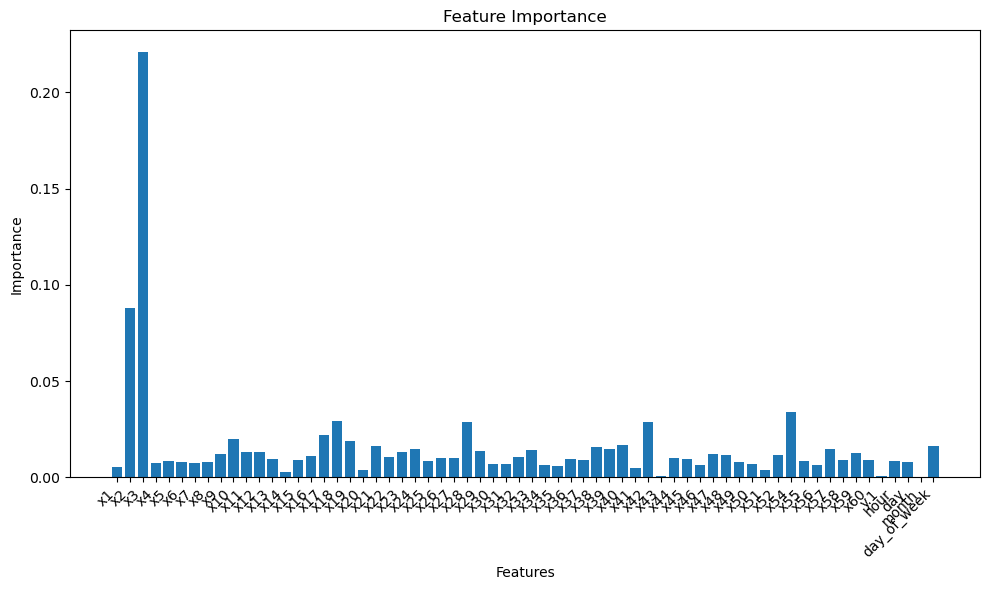

In [72]:
import matplotlib.pyplot as plt

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

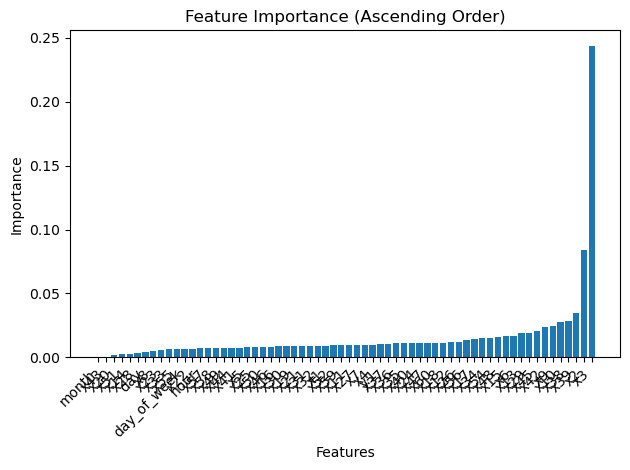

In [45]:
df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
df = df.sort_values(by='Importance')

plt.bar(df['Feature'], df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance (Ascending Order)")
plt.tight_layout()
plt.show()

In [73]:
fi = pd.DataFrame({'feature': features,
                   'importance': rf_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head(5)

,feature,importance
2,x3,0.221107
1,x2,0.087843
52,x54,0.033778
17,x18,0.029191
27,x28,0.028861


In [74]:
# Droping the less important features 

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=True)
threshold = 0.01
least_important_features = sorted_importances[sorted_importances < threshold].index
X_train_dropped = X_train.drop(least_important_features, axis=1)
X_test_dropped = X_test.drop(least_important_features, axis=1)
print(f"Dropped features: {least_important_features}")

Dropped features: Index(['month', 'y.1', 'x43', 'x14', 'x51', 'x20', 'x41', 'x1', 'x35', 'x46',
       'x56', 'x34', 'x30', 'x50', 'x31', 'x7', 'x4', 'x49', 'day', 'x6', 'x8',
       'hour', 'x5', 'x55', 'x25', 'x60', 'x37', 'x15', 'x58', 'x36', 'x45',
       'x13', 'x26', 'x44'],
      dtype='object')


In [75]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100, 200, 300],
    'max_depth':[5, 10, 20],
    'min_samples_split':[2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_dropped, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Parameters:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy:  0.9979617487701103


In [76]:
# cross validation score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train_dropped, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.4f}")

Cross-Validation Accuracy: 0.9976


In [ ]:
# Normalization/Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Logistic Regression Model

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

In [ ]:
y_pred_lr = lr_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_lr)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score, log_loss

In [ ]:
target_names = ['Negative(0)', 'Positive(1)']

print(classification_report(y_test, lr_model.predict(X_test), target_names=target_names)) 

In [ ]:
plot_confusion_matrix(lr_model, X_test, y_test)

In [ ]:
plot_roc_curve(lr_model, X_test, y_test)
plt.title("Plot of ROC Curve for LR Model")
plt.show()

In [ ]:
log_loss(y_test, lr_model.predict(X_test))

### Ada Boost Classifier

In [ ]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_test, y_test)

In [ ]:
y_pred_ada = ada_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_ada)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score, log_loss

In [ ]:
target_names = ['Nagative(0)', 'Positive(1)']

print(classification_report(y_test, ada_model.predict(X_test), target_names=target_names))

In [ ]:
plot_confusion_matrix(ada_model, X_test, y_test)

In [ ]:
plot_roc_curve(ada_model, X_test, y_test)
plt.title("Plot of ROC Curve for LR Model")
plt.show()

In [ ]:
log_loss(y_test, ada_model.predict(X_test))